# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.0, E_test is 0.013448000000000003
Average number of iterations is 38.163.


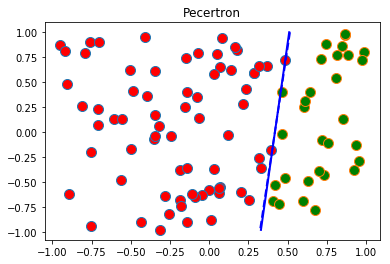

In [57]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000
error_train = 0
error_test = 0
iters = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    #w_g, iters = perceptron(X, y)
    
    X_train = X[:, :nTrain]
    y_train = y[:, :nTrain]
    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    w_g_train, iters_train = perceptron(X_train, y_train)
    iters += iters_train
    y_train_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    error_train += (y_train_label != y_train).sum() / nTrain
    
    y_test_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    error_test += (y_test_label != y_test).sum() / nTest
    
E_train = error_train / nRep
E_test = error_test / nRep
avgIter = iters / nRep

    
    # Compute training, testing error
    
    # Sum up number of iterations
    
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X_train, y_train, w_f, w_g_train, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

In [58]:
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')


KeyboardInterrupt: 

### Part3: Linear Regression

E_train is 0.03961000000000004, E_test is 0.049058500000000026


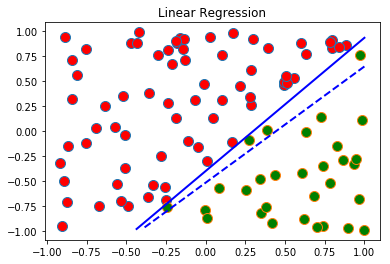

In [80]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 10000
error_train = 0
error_test = 0


for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    #w_g, iters = perceptron(X, y)
    
    X_train = X[:, :nTrain]
    y_train = y[:, :nTrain]
    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    w_g_train = linear_regression(X_train, y_train)
    # Compute training, testing error
    y_train_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    error_train += (y_train_label != y_train).sum() / nTrain
    
    y_test_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    error_test += (y_test_label != y_test).sum() / nTest

    
E_train = error_train / nRep
E_test = error_test / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X_train, y_train, w_f, w_g_train, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.13310000000000002, E_test is 0.14387830000000001


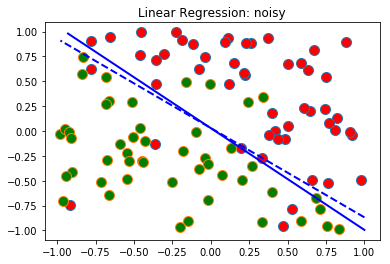

In [82]:

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 10000
error_train = 0
error_test = 0


for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    #w_g, iters = perceptron(X, y)
    
    X_train = X[:, :nTrain]
    y_train = y[:, :nTrain]
    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    w_g_train = linear_regression(X_train, y_train)
    # Compute training, testing error
    y_train_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    error_train += (y_train_label != y_train).sum() / nTrain
    
    y_test_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    error_test += (y_test_label != y_test).sum() / nTest

    
E_train = error_train / nRep
E_test = error_test / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X_train, y_train, w_f, w_g_train, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [84]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)

# Compute training, testing error
def calc(x, y, w):
    xx = x.copy()
    x = np.vstack((np.ones((1, xx.shape[1])), xx))
    yy = np.sign(np.matmul(w.T, x))
    error = (yy != y).sum()
    return error / y.shape[1]
E_train = calc(X, y, w)
E_test = calc(X_test, y_test, w)

print('E_train is {}, E_test is {}'.format(E_train, E_test))



# poly_fit with transform
X_t = np.vstack((X, X[0, :] * X[1, :], X[0, :] * X[0, :], X[1, :] * X[1, :]))
X_test_t = np.vstack((X_test, X_test[0, :] * X_test[1, :], X_test[0, :] * X_test[0, :], X_test[1, :] * X_test[1, :]))
w = linear_regression(X_t, y)
# Compute training, testing error
E_train = calc(X_t, y, w)
E_test = calc(X_test_t, y_test, w)

print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

E_train is 0.04479999999999998, E_test is 0.05282900000000002


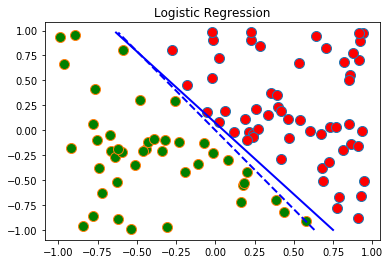

In [108]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100 # number of training data
nTest = 10000
error_train = 0
error_test = 0


for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    #w_g, iters = perceptron(X, y)
    
    X_train = X[:, :nTrain]
    y_train = y[:, :nTrain]
    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    y_train_ = (y_train + 1) / 2
    w_g_train = logistic(X_train, y_train_)
    # Compute training, testing error
    
    y_train_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))) * 2 - 1)
    error_train += (y_train_label != y_train).sum() / nTrain
    
    y_test_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))) * 2 - 1)
    error_test += (y_test_label != y_test).sum() / nTest

    
E_train = error_train / nRep
E_test = error_test / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X_train, y_train, w_f, w_g_train, 'Logistic Regression')

## Part7: Logistic Regression: noisy

E_train is 0.1471000000000001, E_test is 0.16119799999999998


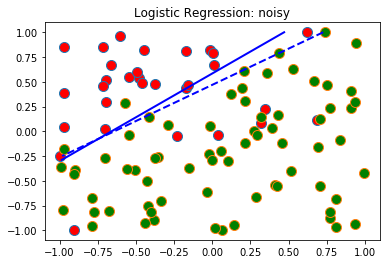

In [109]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100 # number of training data
nTest = 10000
error_train = 0
error_test = 0


for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, "noisy")
    #w_g, iters = perceptron(X, y)
    
    X_train = X[:, :nTrain]
    y_train = y[:, :nTrain]
    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    y_train_ = (y_train + 1) / 2
    w_g_train = logistic(X_train, y_train_)
    # Compute training, testing error
    
    y_train_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))) * 2 - 1)
    error_train += (y_train_label != y_train).sum() / nTrain
    
    y_test_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))) * 2 - 1)
    error_test += (y_test_label != y_test).sum() / nTest

    
E_train = error_train / nRep
E_test = error_test / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X_train, y_train, w_f, w_g_train, 'Logistic Regression: noisy')

## Part8: SVM

E_train is 0.0, E_test is 0.03403640000000003
Average number of support vectors is 3.546.


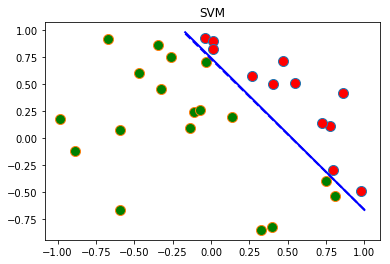

In [119]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 30 # number of training data
nTest = 10000
error_train = 0
error_test = 0
cnt_vec = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    #w_g, iters = perceptron(X, y)
    
    X_train = X[:, :nTrain]
    y_train = y[:, :nTrain]
    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    w_g_train, cnt = svm(X_train, y_train)
    # Compute training, testing error
    
    y_train_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    error_train += (y_train_label != y_train).sum() / nTrain
    
    y_test_label = np.sign(np.matmul(w_g_train.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    error_test += (y_test_label != y_test).sum() / nTest
    
    cnt_vec += cnt

    
E_train = error_train / nRep
E_test = error_test / nRep
avgNum = cnt_vec / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X_train, y_train, w_f, w_g_train, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.